## Análisis de acervo de información del SITU

### Capas geográficas

El presente código busca identificar el número de capas que existen actualmente en el Sistema de Información Territorial y Urbano, el sistema de coordenadas en el que se encuentra cada capa, el número de capas más visitas, las menos visitadas y cuándo fue la última vez que se actualizó la capa.

In [308]:
import pandas as pd
import requests
from matplotlib import pyplot as plt

In [309]:
url_capas="https://situ.sedatu.gob.mx/wa/publico/getCapas/"

In [310]:
response = requests.get(url_capas)
response.status_code

200

In [311]:
capas=pd.DataFrame(response.json()).rename(columns=str.lower)
#Transformar nan de viewcount a 0
capas["viewcount"]=capas["viewcount"].fillna(0)
#Ordenar por viewcount
capas=capas.sort_values("viewcount",ascending=False)
#Calcular porcentaje de visitas
capas["pct_view_capa"]=(capas["viewcount"]/capas["viewcount"].sum())*100
#Calcular número de días desde la última actualización
capas["dias_ultima_actualizacion"]=(pd.Timestamp.now()-pd.to_datetime(capas["lastupdated"])).dt.days
#Rellenar nans con 0
capas["dias_ultima_actualizacion"]=capas["dias_ultima_actualizacion"].fillna(0)
#Años sin actualizar la capa
capas["anios_sin_actualizar"]=capas["dias_ultima_actualizacion"]/365

In [312]:
capas

,titulo,tema,subtema,url,srs,wms,wfs,descripcion,desagregacion,fecha,...,filtro_entidad,filtro_municipio,filtro_localidad,leyenda_simb,filtro_minimo,llave_geoest,palabras_clave,pct_view_capa,dias_ultima_actualizacion,anios_sin_actualizar
61,a__16_SIA_INEGI_2020,Carga Inicial,Carga Inicial,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,13/09/2019,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,fid,,5.372761,678.0,1.857534
779,Metrópolis de México 2020: Metrópolis,Metrópolis,Metrópolis,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:6372,image/png,json,,0,Sin Información,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,ogc_fid,,2.353186,418.0,1.145205
111,PACTUM. Ciclovias,OTROS,PACTUM,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,Sin Información,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,fid_1,,2.259475,678.0,1.857534
133,PACTUM. Area de influencia de ciclovias,OTROS,PACTUM,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,Sin Información,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,fid,,2.228238,678.0,1.857534
1520,PACTUM. Calles a intervenir,OTROS,PACTUM,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,Sin Información,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,fid,,2.165764,678.0,1.857534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Ejes Viales Baja California Sur Marco Geoestad...,Carga Inicial,Carga Inicial,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,13/09/2019,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,fid,,0.000000,678.0,1.857534
1034,Expropiaciones RAN 2020,OTROS,OTROS,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,9,07/08/2020,...,Cve_Ent,Cve_MunC,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,Cve_MunC,,0.000000,0.0,0.000000
1035,Indicadores de calidad del agua superficial 20...,Carga Inicial,Carga Inicial,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,17/06/2020,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,fid,,0.000000,678.0,1.857534
1041,Proyecto PMOTDU-Conductos de PEMEX de Comalcal...,Planeación,Desarrollo Urbano,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,Sin Información,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,fid,,0.000000,678.0,1.857534


In [313]:
#Número y porcentaje de srs
tabla_crs=capas.groupby("srs").size().reset_index(name="numero")
#Calcular porcentaje
tabla_crs["pct"]=(tabla_crs["numero"]/tabla_crs["numero"].sum())*100
#Ordenar por número
tabla_crs=tabla_crs.sort_values("numero",ascending=False)
#Agregar "Total" a srs y poner suma de numero y pct
tabla_crs= pd.concat([tabla_crs,pd.DataFrame([["Total",tabla_crs["numero"].sum(),tabla_crs["pct"].sum()]],columns=["srs","numero","pct"])],ignore_index=True)
tabla_crs

,srs,numero,pct
0,EPSG:4326,1658,82.282878
1,EPSG:6372,352,17.468983
2,EPSG:6365,3,0.148883
3,,1,0.049628
4,EPSG:32613,1,0.049628
5,Total,2015,100.000000


#### Visitas

In [314]:
#Máximo y mínimo de visitas
print("Máximo de visitas: ",capas["viewcount"].max())
print("Mínimo de visitas: ",capas["viewcount"].min())

Máximo de visitas:  516.0
Mínimo de visitas:  0.0


In [315]:
#Top 10 de capas más visitadas
mas_visitas=capas.head(10)
mas_visitas

,titulo,tema,subtema,url,srs,wms,wfs,descripcion,desagregacion,fecha,...,filtro_entidad,filtro_municipio,filtro_localidad,leyenda_simb,filtro_minimo,llave_geoest,palabras_clave,pct_view_capa,dias_ultima_actualizacion,anios_sin_actualizar
61,a__16_SIA_INEGI_2020,Carga Inicial,Carga Inicial,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,13/09/2019,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,fid,,5.372761,678.0,1.857534
779,Metrópolis de México 2020: Metrópolis,Metrópolis,Metrópolis,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:6372,image/png,json,,0,Sin Información,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,ogc_fid,,2.353186,418.0,1.145205
111,PACTUM. Ciclovias,OTROS,PACTUM,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,Sin Información,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,fid_1,,2.259475,678.0,1.857534
133,PACTUM. Area de influencia de ciclovias,OTROS,PACTUM,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,Sin Información,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,fid,,2.228238,678.0,1.857534
1520,PACTUM. Calles a intervenir,OTROS,PACTUM,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,Sin Información,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,fid,,2.165764,678.0,1.857534
1973,PACTUM. Ciclopuertos,OTROS,PACTUM,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,Sin Información,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,id,,2.144940,678.0,1.857534
724,Metrópolis de México 2020: Municipios,Metrópolis,Metrópolis,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:6372,image/png,json,,9,Sin Información,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,ogc_fid,,1.780508,418.0,1.145205
1362,Acueductos Aguascalientes INEGI 2018-2019,Carga Inicial,Carga Inicial,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,22/06/2018,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,fid,,1.436901,678.0,1.857534
1619,a__29_AGEBR_INEGI_20201,,,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,Sin Información,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,fid,,1.364015,678.0,1.857534
560,PACTUM. Corredores Ciclistas,OTROS,PACTUM,https://ide.sedatu.gob.mx/geoserver/ows,EPSG:4326,image/png,json,,0,Sin Información,...,,,,https://ide.sedatu.gob.mx/geoserver/ows?servic...,0,Longitud,,0.853811,678.0,1.857534


In [316]:
#Número de capas sin visitas
print("Número de capas sin visitas: ",capas[capas["viewcount"]==0].shape[0])
#Porcentaje del total de capas
print("Porcentaje de capas sin visitas: ",(capas[capas["viewcount"]==0].shape[0]/capas.shape[0])*100)
capas_sin_visita=capas[capas["viewcount"]==0]

Número de capas sin visitas:  686
Porcentaje de capas sin visitas:  34.04466501240695


#### Actualizaciones


In [317]:
print("Máximo de días desde la última actualización: ",capas["dias_ultima_actualizacion"].max())
print("Mínimo de días desde la última actualización: ",capas["dias_ultima_actualizacion"].min())

Máximo de días desde la última actualización:  678.0
Mínimo de días desde la última actualización:  0.0


(array([2.95e+02, 1.46e+02, 1.00e+00, 3.00e+00, 1.57e+03]),
 array([  0. , 135.6, 271.2, 406.8, 542.4, 678. ]),
 <BarContainer object of 5 artists>)

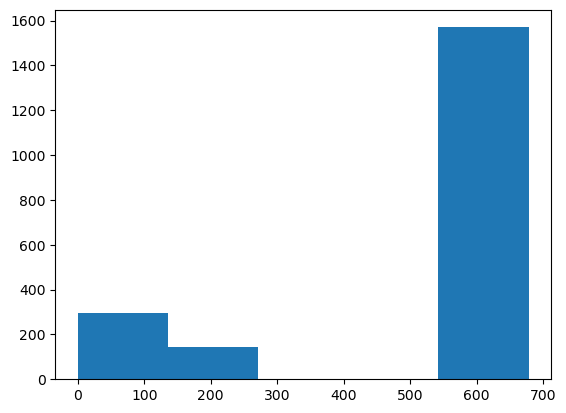

In [318]:
plt.hist(capas["dias_ultima_actualizacion"],bins=5)

(array([2.95e+02, 1.46e+02, 1.00e+00, 3.00e+00, 1.57e+03]),
 array([0.        , 0.37150685, 0.7430137 , 1.11452055, 1.4860274 ,
        1.85753425]),
 <BarContainer object of 5 artists>)

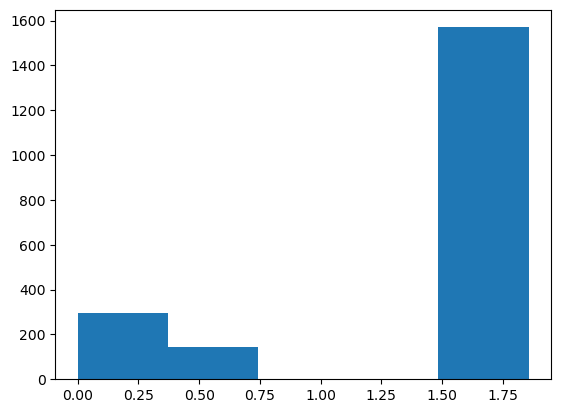

In [319]:
plt.hist(capas["anios_sin_actualizar"],bins=5)

### Documentos

In [320]:
url_docs="https://situ.sedatu.gob.mx/wa/publico/consultaDocumentalTodo"

In [321]:
response_docs = requests.get(url_docs)
response_docs.status_code

200

In [322]:
docs=pd.DataFrame(response_docs.json()).rename(columns=str.lower)
#Años de publicacion a numérico
docs["ano_publicacion"]=pd.to_numeric(docs["ano_publicacion"],errors="coerce")
#Crear url de descarga de sedatu con https://situ.sedatu.gob.mx/wa/publico/getDocumento/ y nombre_archivo
docs["url_descarga_sedatu"]="https://situ.sedatu.gob.mx/wa/publico/getDocumento/"+docs["nombre_archivo"]
print("Número de documentos en el SITU: ",docs.shape[0])
docs

Número de documentos en el SITU:  2438


,folio,nombrecatdoc,descripcioncatdoc,urlcatdoc,idusuario,statusflujo,id_metadato_documento,nombre,descripcion,alias,...,paginas,palabrasclave,nombre_archivo,url_origen,id_vinculacion,fecha_cap_situ,miniatura,fecha_concatenada,flujoautorizacion,url_descarga_sedatu
0,None,Ley Estatal de Planeación,"Conjunto de reglas, normas o preceptos estable...",http://www.marcojuridico.morelos.gob.mx/archiv...,1,None,235,Ley Estatal de Planeación,"Conjunto de reglas, normas o preceptos estable...",LPE,...,32,"Planeación, #LPE",8ba4b95d-5ecf-46ae-885f-9d370615bdd2.pdf,http://www.marcojuridico.morelos.gob.mx/archiv...,17_01_GES_0009,2021-04-01,8ba4b95d-5ecf-46ae-885f-9d370615bdd2,1988/08/31,None,https://situ.sedatu.gob.mx/wa/publico/getDocum...
1,None,Plan Estatal de Desarrollo 2017-2021,Instrumento para orientar el desarrollo de Nay...,https://www.nayarit.gob.mx/plan-estatal,1,None,245,Plan Estatal de Desarrollo 2017-2021,Instrumento para orientar el desarrollo de Nay...,PED,...,482,"Plan de Desarrollo, #PED",45f2b310-6a83-4833-98c9-28aebec5ec14.pdf,https://www.nayarit.gob.mx/plan-estatal,18_02_GES_0009,2021-04-01,45f2b310-6a83-4833-98c9-28aebec5ec14,2017//,None,https://situ.sedatu.gob.mx/wa/publico/getDocum...
2,None,Ley de Planeación del Estado de Zacatecas y su...,"Conjunto de reglas, normas o preceptos estable...",https://www.congresozac.gob.mx/63/ley&cual=223...,1,None,375,Ley de Planeación del Estado de Zacatecas y su...,"Conjunto de reglas, normas o preceptos estable...",LPEyM,...,47,"#LeyPlaneación, Planeación del Desarrollo",bb45ec2f-19d3-4df9-8241-746f967e6ad2.pdf,https://www.congresozac.gob.mx/63/ley&cual=223...,32_01_GES_0006,2021-05-01,bb45ec2f-19d3-4df9-8241-746f967e6ad2,2017/08/09,None,https://situ.sedatu.gob.mx/wa/publico/getDocum...
3,None,Ley de Vivienda del Estado de Durango,"Conjunto de reglas, normas o preceptos estable...",http://congresodurango.gob.mx/Archivos/legisla...,1,None,162,Ley de Vivienda del Estado de Durango,"Conjunto de reglas, normas o preceptos estable...",LV,...,33,"Vivienda Durango, #LeyViviendaDugo",63645cf2-4d5e-44ca-a694-4fd1c4bf468f.pdf,http://congresodurango.gob.mx/Archivos/legisla...,10_01_GES_0007,2021-04-01,63645cf2-4d5e-44ca-a694-4fd1c4bf468f,2011/05/22,None,https://situ.sedatu.gob.mx/wa/publico/getDocum...
4,None,Actualización del Atlas de Riesgos del Estado ...,Documento que sirve como instrumento base de c...,http://rmgir.proyectomesoamerica.org/PDFAtlasE...,1,None,267,Ley de Catastro Municipal del Estado de Jalisco,"Conjunto de reglas, normas o preceptos estable...",Ley de Catastro,...,28,"#Catastro, #LeyCatastro",a7f7cb62-f491-4a67-bfb2-9c686ed21acf.pdf,https://info.jalisco.gob.mx/sites/default/file...,14_01_GES_0003,2021-04-01,a7f7cb62-f491-4a67-bfb2-9c686ed21acf,1997/11/18,None,https://situ.sedatu.gob.mx/wa/publico/getDocum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,20241115-1845,Programa de Ordenación de la Zona Metropolita...,Programa de Ordenación de la Zona Metropolita...,None,635,None,2528,Programa de Ordenación de la Zona Metropolita...,Programa de Ordenación de la Zona Metropolita...,POZMTA,...,261,"Metrópolis, Metropolitano, Ordenamiento, POM, ...",9263f05f-ceef-4664-bf0e-e94fe02dc404.pdf,None,,2024-11-15,9263f05f-ceef-4664-bf0e-e94fe02dc404,2024/08/16,None,https://situ.sedatu.gob.mx/wa/publico/getDocum...
2434,20241115-1844,Programa Metropolitano de Orizaba,"Programa Metropolitano de Orizaba, Veracruz de...",None,635,None,2529,Programa Metropolitano de Orizaba,"Programa Metropolitano de Orizaba, Veracruz de...",PM-O,...,132,"Metrópolis, Metropolitano, Zona, Ordenamiento,...",48041201-f3b0-47b9-81d1-02be9f240b00.pdf,None,,2024-11-15,48041201-f3b0-47b9-81d1-02be9f240b00,2024/07/17,None,https://situ.sedatu.gob.mx/wa/publico/getDocum...
2435,20241129-1846,Programa Municipal de Desarrollo Urbano de Ciu...,Programa Municipal de Ordenamiento Territorial...,None,487,None,2530,Programa Municipal de Desarrollo Urbano de Ciu...,Programa 

#### Vigencia

In [323]:
#Número y porcentaje de documentos vigentes
tabla_vigencia=docs.groupby("doc_vigente").size().reset_index(name="numero")
#Calcular porcentaje
tabla_vigencia["pct"]=(tabla_vigencia["numero"]/tabla_vigencia["numero"].sum())*100
#Ordenar por número
tabla_vigencia=tabla_vigencia.sort_values("numero",ascending=False)
#Agregar "Total" a doc_vigente y poner suma de numero y pct
tabla_vigencia= pd.concat([tabla_vigencia,pd.DataFrame([["Total",tabla_vigencia["numero"].sum(),tabla_vigencia["pct"].sum()]],columns=["doc_vigente","numero","pct"])],ignore_index=True)
tabla_vigencia

,doc_vigente,numero,pct
0,Vigente,2213,90.771124
1,Histórico,115,4.716981
2,,107,4.388843
3,Proyecto,3,0.123052
4,Total,2438,100.000000


#### Tipos de documento

In [324]:
#Número y porcentaje de tipos de documento  
tabla_tipo=docs.groupby("tipo").size().reset_index(name="numero")
#Calcular porcentaje
tabla_tipo["pct"]=(tabla_tipo["numero"]/tabla_tipo["numero"].sum())*100
#Ordenar por número
tabla_tipo=tabla_tipo.sort_values("numero",ascending=False)
#Agregar "Total" a tipo y poner suma de numero y pct
tabla_tipo= pd.concat([tabla_tipo,pd.DataFrame([["Total",tabla_tipo["numero"].sum(),tabla_tipo["pct"].sum()]],columns=["tipo","numero","pct"])],ignore_index=True)
tabla_tipo


,tipo,numero,pct
0,Instrumento de planeación,1527,62.633306
1,Normativo,469,19.237080
2,Otros,342,14.027892
3,Instrumento de Planeación,52,2.132896
4,Investigación,32,1.312551
5,Libro,7,0.287121
6,Artículo en revista,4,0.164069
7,Artículo en revista indexada,3,0.123052
8,Revista,1,0.041017
9,Revista Indexada,1,0.041017


#### Años de publicación

In [325]:
print("Máximo de años de publicación: ",docs["ano_publicacion"].max())
print("Mínimo de años de publicación: ",docs["ano_publicacion"].min())
print("Mínimo de años de publicación sin ceros: ",docs[docs["ano_publicacion"]!=0]["ano_publicacion"].min())

Máximo de años de publicación:  2029
Mínimo de años de publicación:  0
Mínimo de años de publicación sin ceros:  1888


In [326]:
#Contar ceros en año de publicación
print("Número de documentos sin año de publicación: ",docs[docs["ano_publicacion"]==0].shape[0])

Número de documentos sin año de publicación:  7


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  12.,   4.,
          1.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   4.,   0.,   3.,   3.,   2.,
          0.,   7.,   5.,   1.,  10.,   8.,   2.,  12.,  13.,  42.,   5.,
          9.,  20.,  21.,  34.,  20., 104.,  34.,  41., 104.,  77., 278.,
        103.,  93., 208.,  79., 340., 221., 120., 215., 159.,   0.,   0.,
          1.]),
 array([1888.  , 1889.41, 1890.82, 1892.23, 1893.64, 1895.05, 1896.46,
        1897.87, 1899.28, 1900.69, 1902.1 , 1903.51, 1904.92, 1906.33,
        1907.74, 1909.15, 1910.56, 1911.97, 1913.38, 1914.79, 1916.2 ,
        1917.61, 1919.02, 1920.43, 1921.84, 1923.25, 1924.66, 1926.07,
        1927.48, 1928.89, 1930.3 ,

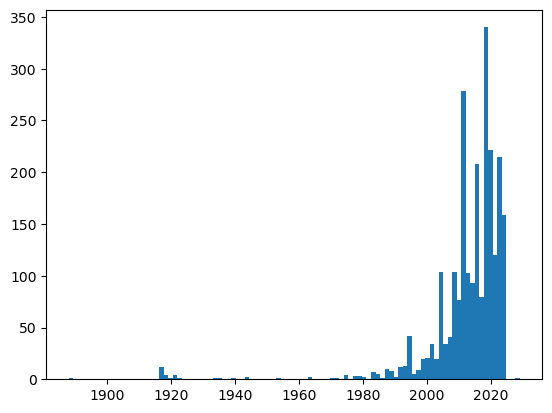

In [327]:
#Histograma de años de publicación sin ceros
plt.hist(docs[docs["ano_publicacion"]!=0]["ano_publicacion"],bins=100)


#### Documentos más consultados

In [328]:
url_mas_consultados="https://situ.sedatu.gob.mx/wa/publico/documentosMasConsultados/"

In [329]:
response_mas_consultados = requests.get(url_mas_consultados)
response_mas_consultados.status_code


200

In [330]:
mas_consultados=pd.DataFrame(response_mas_consultados.json()).rename(columns=str.lower)
#Dejar id_metadato_documento y visitas
mas_consultados=mas_consultados[["id_metadato_documento","visitas"]]
print("Máximo de visitas: ",mas_consultados["visitas"].max())
print("Mínimo de visitas: ",mas_consultados["visitas"].min())

Máximo de visitas:  25
Mínimo de visitas:  9


In [331]:
# Assuming mas_consultados has a column 'id_metadato_documento' and 'visitas'
# Perform a left merge to keep all rows in the original `docs`
docs = pd.merge(docs, mas_consultados[['id_metadato_documento', 'visitas']], 
                on='id_metadato_documento', how='left')

# Fill NaN values in the 'visitas' column with 0 (or another default value)
docs['visitas'] = docs['visitas'].fillna(0)

#Documentos con menos del mínimo de visitas de mas_consultados
print("Número de documentos con menos de 9 visitas: ",docs[docs["visitas"]==0].shape[0])
#Porcentaje del total de documentos
print("Porcentaje de documentos con menos de 9 visitas: ",(docs[docs["visitas"]==0].shape[0]/docs.shape[0])*100)


Número de documentos con menos de 9 visitas:  2428
Porcentaje de documentos con menos de 9 visitas:  99.58982772764561
